In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st
import statsmodels.api as sm
from scipy.constants import golden 

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize = (5.0, 5.0/golden)) 

parks = pd.read_csv('SF_Park_Scores.csv', sep = ',', decimal=".", parse_dates=True)
parks

,ParkID,PSA,Park,FQ,Score,Facility Type,Facility Name,Address,State,Zipcode,Floor Count,Square Feet,Perimeter Length,Acres,Longitude,Latitude
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795,Basketball Court,Ocean View Basketball Courts,Capitol & Montana St,CA,94112.0,NaN,5572.020314,311.982228,0.127916,-122.456708,37.716335
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957,Ball Field,Glen ball fields,Diamond & Farnum Street,CA,94131.0,NaN,124520.486259,1891.675445,2.858608,-122.440592,37.736008
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864,Dog Play Area,Douglass dog play area,26th & Douglass Street,CA,94114.0,NaN,70655.337234,1153.019646,1.622030,-122.438895,37.746741
3,117,PSA2,Alamo Square,FY05Q4,0.857,Restroom,Gilman Bathrooms,Gilman Ave & Griffith,CA,94124.0,NaN,378.668603,94.257319,0.008693,-122.388772,37.717179
4,60,PSA6,Jose Coronado Playground,FY05Q4,0.859,Basketball Court,GGP1 Panhandle Basketball Courts,Stanyan & Great Hwy,CA,94117.0,NaN,4645.553645,279.465313,0.106648,-122.448380,37.772304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5489,151,PSA1,Alice Marble Tennis Courts,FY14Q4,0.985,Restroom,Marina Green Bathrooms East,Marina Blvd,CA,94123.0,1.0,494.310709,93.513952,0.011348,-122.434531,37.806461
5490,28,PSA3,John McLaren Park,FY14Q4,0.769,Ball Field,Parkside ball fields,28th Ave & Vicente,CA,94116.0,NaN,104340.628735,1513.141710,2.395341,-122.484301,37.738385
5491,170,PSA1,Woh Hei Yuen Park,FY14Q4,0.900,Activity Center,GGP3 County Fair Bldg,Stanyan & Great Hwy,CA,94117.0,1.0,28191.724791,1359.813257,0.647196,-122.467165,37.766564
5492,145,PSA1,Ina Coolbrith Mini Park,FY14Q4,0.840,Restroom,Noe Valley Courts Bathrooms,24th & Douglass St,CA,94114.0,1.0,391.332099,98.012448,0.008984,-122.439218,37.751485


In [2]:
#1.2 Elencate gli attributi numerici 
parks.describe()

,ParkID,Score,Zipcode,Floor Count,Square Feet,Perimeter Length,Acres,Longitude,Latitude
count,5494.000000,5494.000000,4719.000000,1324.000000,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000
mean,32991.238260,0.897962,94117.015469,1.205438,26631.239099,548.798660,0.611372,-122.442014,37.755449
std,150843.356703,0.117428,7.789351,0.555411,63124.930195,793.532309,1.449155,0.032165,0.025242
min,1.000000,0.000000,94102.000000,1.000000,213.120658,60.729108,0.004893,-122.510114,37.708446
25%,55.000000,0.859000,94112.000000,1.000000,1379.550956,169.151099,0.031670,-122.465363,37.737555
50%,106.000000,0.931000,94116.000000,1.000000,4241.343735,285.193904,0.097368,-122.438155,37.756926
75%,154.000000,0.976000,94122.000000,1.000000,10192.913376,513.541252,0.233998,-122.414374,37.773748
max,957226.000000,1.000000,94134.000000,4.000000,515443.479217,5506.267664,11.833001,-122.383721,37.806461


In [5]:
#1.3 Quanti parchi sono presenti nel dataset ?
len(parks)

5494

In [12]:
#1.4 Quanti e quali sono i valori osservati per ParkServiceArea
print(parks.PSA.unique())
print(len(parks.PSA.unique()))

['PSA4' 'PSA2' 'PSA6' 'PSA3' 'GGP' 'PSA1' 'PSA5']
7


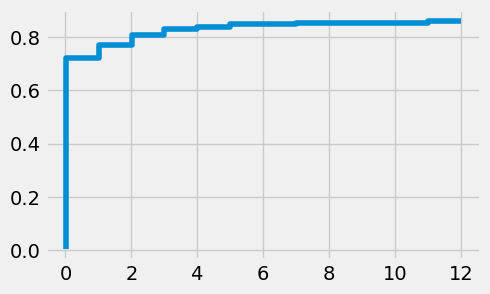

In [15]:
#1.5 Visualizzate il grafico della funzione cumulativa empirica per l’attributo Acreage.
ecdf = sm.distributions.ECDF(parks['Acres'])
x = np.arange(parks['Acres'].min(), parks['Acres'].max()+1)
y = ecdf(x)
plt.step(x,y)
plt.show()

In [3]:
#1.6 Completate la seguente frase: “la metà dei parchi di San Francisco ha una estensione maggiore di ....... acri”.
print('La metà dei parchi di San Francisco ha un esternsione maggiore di 0.097368 acri.')

La metà dei parchi di San Francisco ha un esternsione maggiore di 0.097368 acri.


In [4]:
#1.7 Estensione media in acri dei parchi di San Francisco
parks.Acres.mean()

0.6113715709175647

In [7]:
#1.9 Quanti parchi di San Francisco hanno una estensione minore di 50 acri?
len(parks[parks.Acres < 50].dropna())

1324